Required packets

In [1]:
from scipy.signal import find_peaks
import torch
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Peek Detection

Load the transform and retrive the right threshold based on the scale, need to understand how to deal with trend probably must be sum

In [2]:
series = read_csv('coefficents.csv', header = 0, index_col = 0, parse_dates= True).squeeze('columns')

# Initialize lists to store coefficients and heights
wav_coef = []
height = []
time_index = series.index
time_diff = time_index.to_series().diff().min()
rows = series.shape[0]
columns = series.shape[1]

# To decide the threshold based on the sampling frequency
daily_threshold = pd.Timedelta(days=1)
weekly_threshold = pd.Timedelta(weeks=1)
monthly_threshold = pd.Timedelta(days=28)

print(time_diff)

if time_diff < daily_threshold:
  time_diff = 0
  final_result = torch.zeros(rows, columns // 4, 4)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Determine the height based on the column name or any other criteria
      if 'daily' in column.lower():
          height.append(1)
      elif 'weekly' in column.lower():
          height.append(2)
      elif 'monthly' in column.lower():
          height.append(4)
      elif 'yearly' in column.lower():
          height.append(15)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == daily_threshold:
  time_diff = 1
  final_result = torch.zeros(rows, columns // 3, 3)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Determine the height based on the column name or any other criteria
      if 'weekly' in column.lower():
          height.append(0.5)
      elif 'monthly' in column.lower():
          height.append(1)
      elif 'yearly' in column.lower():
          height.append(2)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == weekly_threshold:
  time_diff = 2
  final_result = torch.zeros(rows, columns // 2, 2)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)


      if 'monthly' in column.lower():
          height.append(0.5)
      elif 'yearly' in column.lower():
          height.append(1)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == monthly_threshold:
  time_diff = 3
  final_result = torch.zeros(rows, columns, 1)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      if 'yearly' in column.lower():
          height.append(1)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")

print(height)

1 days 00:00:00
[0.5, 1, 2, 0.5, 1, 2]


Find the index for each scale of those part with a match higher then the threshold

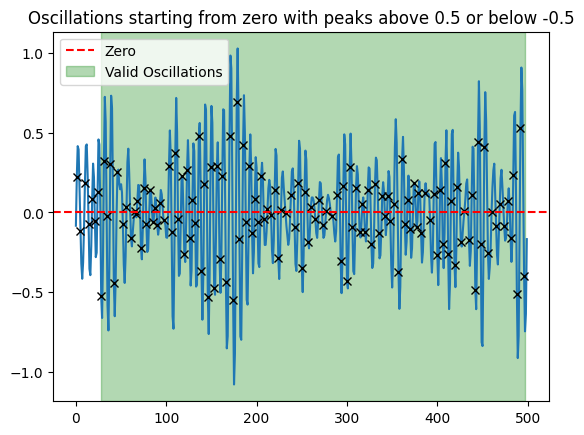

No consecutive index 45-103
No consecutive index 112-136
No consecutive index 191-352
No consecutive index 360-409
No consecutive index 418-442
No consecutive index 455-484
[ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
 103 104 105 106 107 108 109 110 111 112 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 352 353 354 355 356 357
 358 359 360 409 410 411 412 413 414 415 416 417 418 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 484 485 486 487 488 489 490 491 492
 493 494 495 496 497]
torch.Size([500, 2, 3])


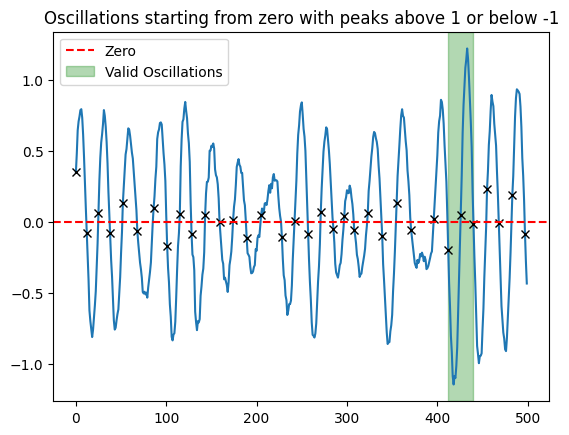

[]
torch.Size([500, 2, 3])


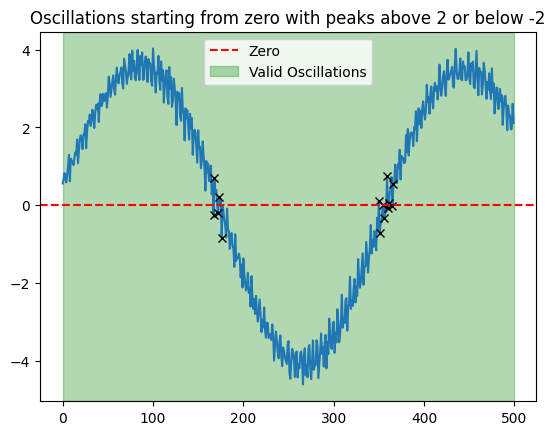

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

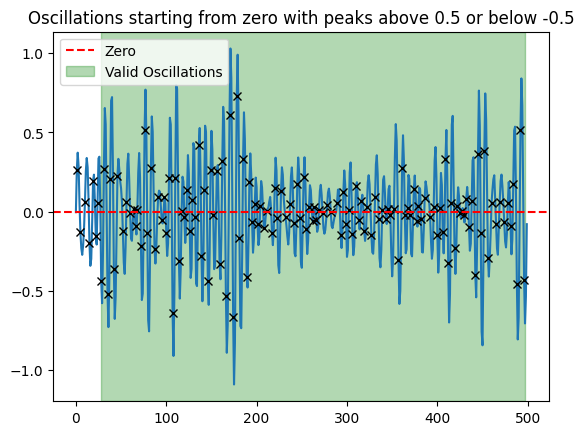

No consecutive index 45-72
No consecutive index 86-103
No consecutive index 116-136
No consecutive index 151-162
No consecutive index 188-352
No consecutive index 360-409
No consecutive index 418-442
No consecutive index 455-484
[ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 352 353 354 355 356 357 358 359 360 409 410 411 412 413 414 415 416 417
 418 442 443 444 445 446 447 448 449 450 451 452 453 454 455 484 485 486
 487 488 489 490 491 492 493 494 495 496 497]
torch.Size([500, 2, 3])


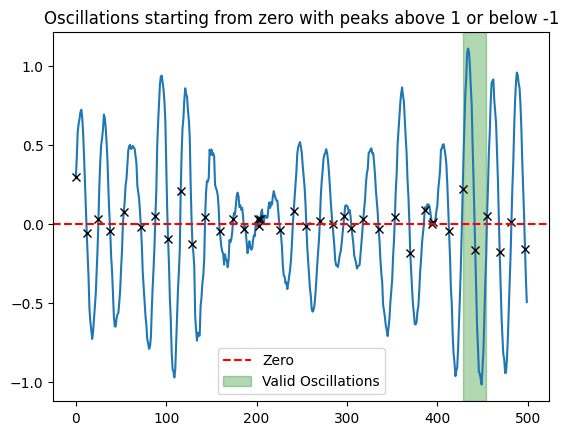

[]
torch.Size([500, 2, 3])


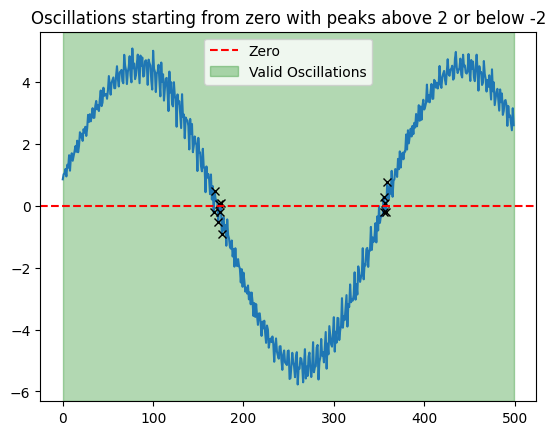

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

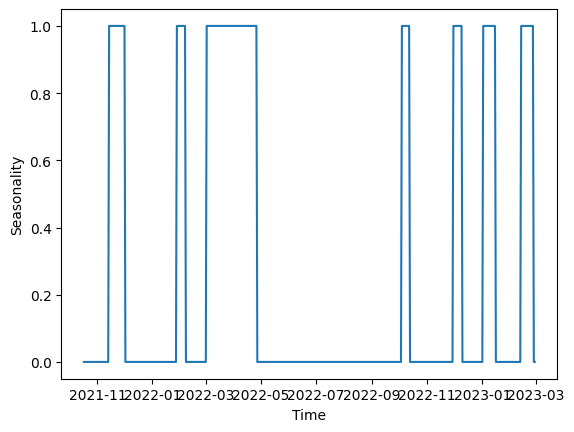

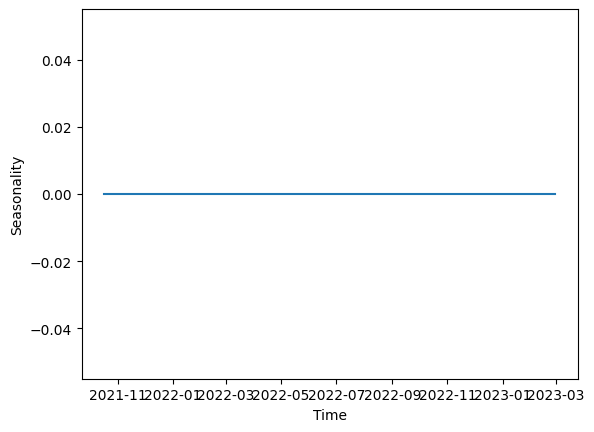

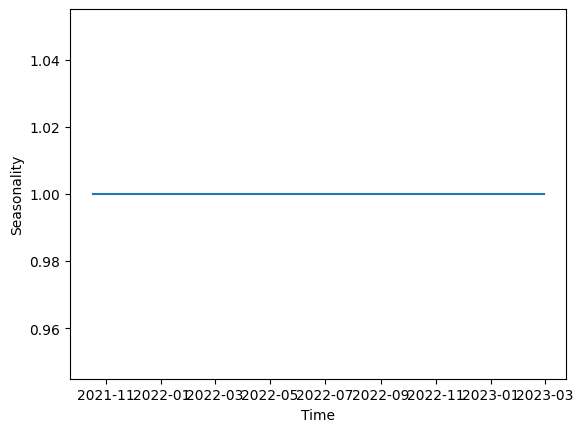

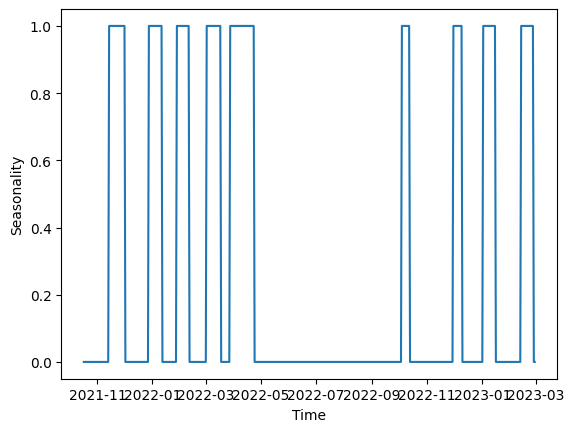

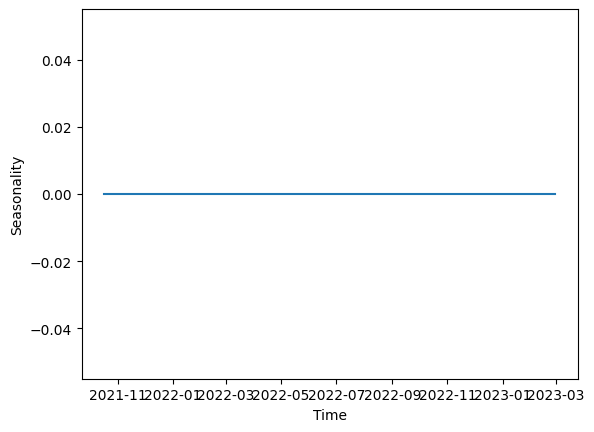

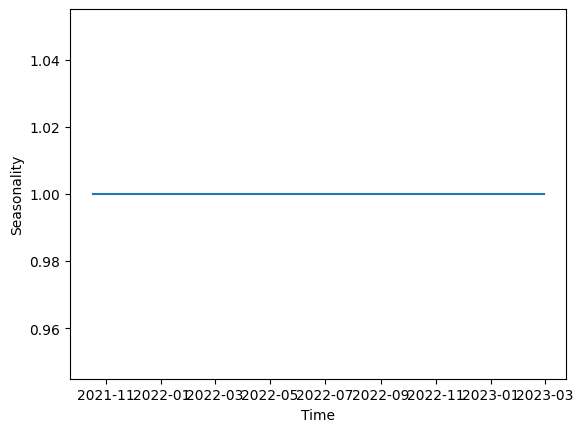

In [3]:
iter = 0
for height, coef in zip(height, wav_coef):
  iter = iter + 1

  # Assuming coef is your ndarray
  peaks_above, _ = find_peaks(coef, height)
  peaks_below, _ = find_peaks(-coef, height)
  # Combine the peaks from both conditions
  all_peaks = np.concatenate([peaks_above, peaks_below])
  # Sort the indices for plotting purposes
  all_peaks = np.sort(all_peaks)

  # Find zero-crossings by detecting sign changes
  coefsign = np.sign(coef)
  signchange = ((np.roll(coefsign, 1) - coefsign) != 0).astype(int)
  zero_crossings = np.where(signchange == 1)[0]
  #zero_crossings = np.where(np.diff(np.sign(coef)) != 0)[0]

  # Initialize an array to store indices of all oscillations
  all_oscillations = []

  if all_peaks.size == 0:
    print(f'All points under {height}')
    continue

  if all_peaks[0] < zero_crossings[0]:
    i = zero_crossings[0]
    all_oscillations.extend(range(0, i))

  # Iterate through zero-crossings to identify entire oscillations
  for i in range(len(zero_crossings) - 1):
      start_index = zero_crossings[i]
      end_index = zero_crossings[i + 1]

      # Check if there are peaks above the threshold within the interval
      if np.max(coef[start_index:end_index]) > height or np.min(coef[start_index:end_index]) < -height:
          all_oscillations.extend(range(start_index, end_index))


  # Check if the last peak is above the threshold
  if all_peaks[-1] > zero_crossings[-1]:
      start_index = zero_crossings[-1]
      end_index = all_peaks[-1]


      # Extend the oscillation to the right if values are increasing
      while end_index < len(coef) - 1 and coef[end_index] > coef[end_index + 1]:
          end_index += 1

      all_oscillations.extend(range(start_index, end_index + 1))

  # Convert the list to a NumPy array
  all_oscillations = np.unique(all_oscillations).tolist()

  # Plotting
  plt.plot(coef)
  #plt.plot(all_peaks, coef[all_peaks], "xk")
  plt.plot(zero_crossings, coef[zero_crossings], "xk")
  plt.axhline(y=0, color='r', linestyle='--', label='Zero')
  plt.axvspan(all_oscillations[0], all_oscillations[-1], color='green', alpha=0.3, label='Valid Oscillations')
  plt.title(f'Oscillations starting from zero with peaks above {height} or below {-height}')
  plt.legend()
  plt.show()


  # Check for consecutive index
  for i in range(len(all_oscillations)-1):
    if all_oscillations[i]+1 != all_oscillations[i+1]:
      count = all_oscillations[i+1]-all_oscillations[i]
      if time_diff == 0:
        if (iter % 4) == 1 and count <= 24:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 2 and count <= 24*7:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 3 and count <= 24*28:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 0 and count <= 24*360:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      elif time_diff == 1:
        if (iter % 3) == 1 and count <= 7:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 3) == 2 and count <= 28:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 3) == 0 and count <= 360:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      elif time_diff == 2:
        if (iter % 2) == 1 and count <= 4:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 2) == 0 and count <= 4*12:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      else:
        if count <= 12:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))

  all_oscillations = np.unique(all_oscillations)

  # Create a new list to store the non-consecutive indices
  non_consecutive_indices = []

  # Initialize a variable to store the count threshold based on time_diff and iter
  if time_diff == 0:
      if (iter % 4) == 1:
          count_threshold = 24
      elif (iter % 4) == 2:
          count_threshold = 24 * 7
      elif (iter % 4) == 3:
          count_threshold = 24 * 28
      elif (iter % 4) == 0:
          count_threshold = 24 * 360
  elif time_diff == 1:
      if (iter % 3) == 1:
          count_threshold = 7
      elif (iter % 3) == 2:
          count_threshold = 28
      elif (iter % 3) == 0:
          count_threshold = 360
  elif time_diff == 2:
      if  (iter % 2) == 1:
          count_threshold = 4
      elif (iter % 2) == 0:
          count_threshold = 4 * 12
  else:
      count_threshold = 12


  # Iterate through all_oscillations and check for consecutive points
  i = 0
  while i < len(all_oscillations):
      start_index = all_oscillations[i]
      end_index = all_oscillations[i]

      # Find the end of the consecutive sequence
      while i < len(all_oscillations) - 1 and all_oscillations[i] + 1 == all_oscillations[i+1]:
          end_index = all_oscillations[i+1]
          i += 1

      # Check if the consecutive sequence is shorter than the count threshold
      count = end_index - start_index + 1
      if count <= count_threshold:
          non_consecutive_indices.extend(range(start_index, end_index + 1))

      i += 1

  # Remove consecutive indices shorter than the count threshold from all_oscillations
  all_oscillations = np.array([index for index in all_oscillations if index not in non_consecutive_indices])

  i=0

  for i in range(len(all_oscillations)-1):
    if all_oscillations[i]+1 != all_oscillations[i+1]:
      print(f"No consecutive index {all_oscillations[i]}-{all_oscillations[i+1]}")

  print(all_oscillations)

  # Itera su ogni indice in all_oscillations
  for idx in all_oscillations:
    if time_diff == 0:
      final_result[idx, (iter - 1) // 4, (iter - 1) % 4] = 1
    elif time_diff == 1:
      final_result[idx, (iter - 1) // 3, (iter - 1) % 3] = 1
    elif time_diff == 2:
      final_result[idx, (iter - 1) // 2, (iter - 1) % 2] = 1
    else:
      final_result[idx, iter - 1, 0] = 1

  print(final_result.shape)

torch.save(final_result, 'result.pt')
# Plotting
for i in range(final_result.shape[1]):
    for j in range(final_result.shape[2]):
        plt.plot(time_index, final_result[:, i, j])
        plt.xlabel('Time')
        plt.ylabel('Seasonality')
        plt.show()